In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUMBER_OF_PIXEL = 10
K = 3

In [3]:
def main():
    pixels = np.random.randint(0, 255 + 1, size=(NUMBER_OF_PIXEL, 3))
    points = [7, 5, 6, 9,
        11, 15, 56,
        45, 27, 20,
        ]
    k_means(points)
    k_means_for_pixels(pixels)

In [4]:
def pixel_bright(pix1, pix2):
    """Evaluates the proximity of pixel brightness.
    
    f_i = 30 * (Ri-R0)**2 + 59 * (Gi-G0)**2 + 11 * (Bi-B0)**2
    30, 59, 11 -- sensitivity of the human eye to 
    red, green and blue colors.

    """
    R1, G1, B1 = pix1[0], pix1[1], pix1[2]
    R2, G2, B2 = pix2[0], pix2[1], pix2[2]
    return 30 * (R1-R2)**2 + 59 * (G1-G2)**2 + 11 * (B1-B2)**2

In [5]:
def estimate_center(cluster):
    """Find and return mean RGB value in cluster."""
    R, G, B = 0, 0, 0
    len_cluster = len(cluster)
    for pixel in cluster:
        R += pixel[0]
        G += pixel[1]
        B += pixel[2]
    R = round(R / len_cluster)
    G = round(G / len_cluster)
    B = round(B / len_cluster)
    return [R, G, B]

In [6]:
def visualisation_2d(cluster_content):
	"""Show scatter of clusters."""
	k = len(cluster_content)
	plt.grid() 
	plt.xlabel("x")    
	plt.ylabel("y")

	for i in range(k): 
		x_coordinates = []
		y_coordinates = []
		for q in range(len(cluster_content[i])):
			x_coordinates.append(cluster_content[i][q][0])
			y_coordinates.append(cluster_content[i][q][1])
		plt.scatter(x_coordinates, y_coordinates)
	plt.show()

In [7]:
def k_means_for_pixels(pixels):
    """Method k-means for pixels."""
    # 1 point
    samples = random.sample(range(0, NUMBER_OF_PIXEL), K)
    centers = [pixels[s] for s in samples]
    clusters = [[]] * K 
    while True:
        clusters0 = clusters[:]
        clusters = [[]] * K
        # 2 point
        for pixel in pixels:
            proximity = [pixel_bright(pixel, c) for c in centers]
            clusters[np.argmin(proximity)].append(pixel)
        # 3 point
        for i in range(K):
            centers[i] = estimate_center(clusters[i])
        # 4 point
        check = True
        for i in range(len(clusters)):
            for j in range(len(clusters[i])):
                if len(clusters0[i]) != len(clusters[i]):
                    check = False
                    break
                for k in range(len(clusters[i][j])):
                    if clusters[i][j][k] != clusters0[i][j][k]:
                        check = False
        if check:
            break
        visualisation_2d(clusters)
    

In [8]:
def k_means(points):
    """Method k-means for points."""
    # 1 point
    centers = random.sample(points, K)
    clusters = [[]] * K
    while True:
        clusters0 = clusters[:]
        clusters = [[]] * K
        # 2 point
        for point in points:
            distance = [abs(point - c) for c in centers]
            clusters[np.argmin(distance)].append(point)
        print(clusters)
        # 3 point
        for i in range(K):
            centers[i] = round(sum(clusters[i]) / len(clusters[i]))
        print(centers)
        # 4 point
        if clusters == clusters0:
            break
    print(clusters)
    

[[7, 5, 6, 9, 11, 15, 56, 45, 27, 20], [7, 5, 6, 9, 11, 15, 56, 45, 27, 20], [7, 5, 6, 9, 11, 15, 56, 45, 27, 20]]
[20, 20, 20]
[[7, 5, 6, 9, 11, 15, 56, 45, 27, 20], [7, 5, 6, 9, 11, 15, 56, 45, 27, 20], [7, 5, 6, 9, 11, 15, 56, 45, 27, 20]]
[20, 20, 20]
[[7, 5, 6, 9, 11, 15, 56, 45, 27, 20], [7, 5, 6, 9, 11, 15, 56, 45, 27, 20], [7, 5, 6, 9, 11, 15, 56, 45, 27, 20]]


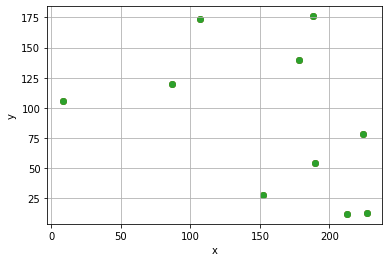

In [9]:
if __name__ == '__main__':
    main()